# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

# Loading Data

In [4]:
original_data = pd.read_csv("dkmacovid_train.csv")

In [5]:
original_data.head()

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,"5,024,279",99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,"733,391",1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,"7,151,502",62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,"3,011,524",57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False


In [6]:
original_data['Resident Population 2020 Census'] = original_data['Resident Population 2020 Census'].str.replace(',','').astype(int)
original_data['Population Density 2020 Census'] = original_data['Population Density 2020 Census'].str.replace(',','').astype(float)

In [7]:
Original_data_copy = original_data

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Original_data_copy.iloc[:, 3:14] = sc.fit_transform(Original_data_copy.iloc[:, 3:14])
Original_data_copy

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,-1.178670,0.304586,-0.200701,0.144028,-0.483568,-0.476902,-1.302217,-0.128626,-0.217091,0.118788,-1.168679,True,False,False
1,2,2,Alaska,3.608919,-3.033032,-0.449116,-0.290315,-0.569578,-1.800519,2.071905,-0.754447,-0.276853,1.614954,3.492526,True,True,False
2,2,3,Arizona,-0.946051,-0.945268,0.389194,0.088543,-0.007494,0.074416,-1.269412,0.181627,-0.239250,0.509092,0.385056,True,True,True
3,2,4,Arkansas,-0.741727,0.025825,-0.482520,0.202252,-0.456622,-0.031311,-0.559356,-0.422184,-0.242302,0.574143,-0.547185,True,True,True
4,2,5,California,-0.552794,-1.365662,4.276989,-0.502599,4.023547,-0.792949,-0.177608,4.905194,-0.122779,-0.922023,0.385056,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,31,46,Vermont,0.753949,1.027710,-0.524201,-2.293948,-0.625809,-0.270412,1.274271,-0.767619,-0.235038,0.378991,-0.236438,True,True,True
1376,31,47,Virginia,-0.280378,0.749535,0.400942,-0.559558,-0.005286,-0.534982,-0.745315,0.397468,-0.144206,-0.726871,-0.236438,True,True,True
1377,31,49,West Virginia,-0.161416,0.607653,-0.488254,-0.195930,-0.475825,0.062389,0.411281,-0.599800,-0.232108,0.248890,0.074309,True,True,True
1378,31,50,Wisconsin,0.790631,0.166286,-0.391879,1.287559,0.129702,-0.830494,0.351006,-0.001819,-0.211231,-0.011313,0.385056,True,True,True


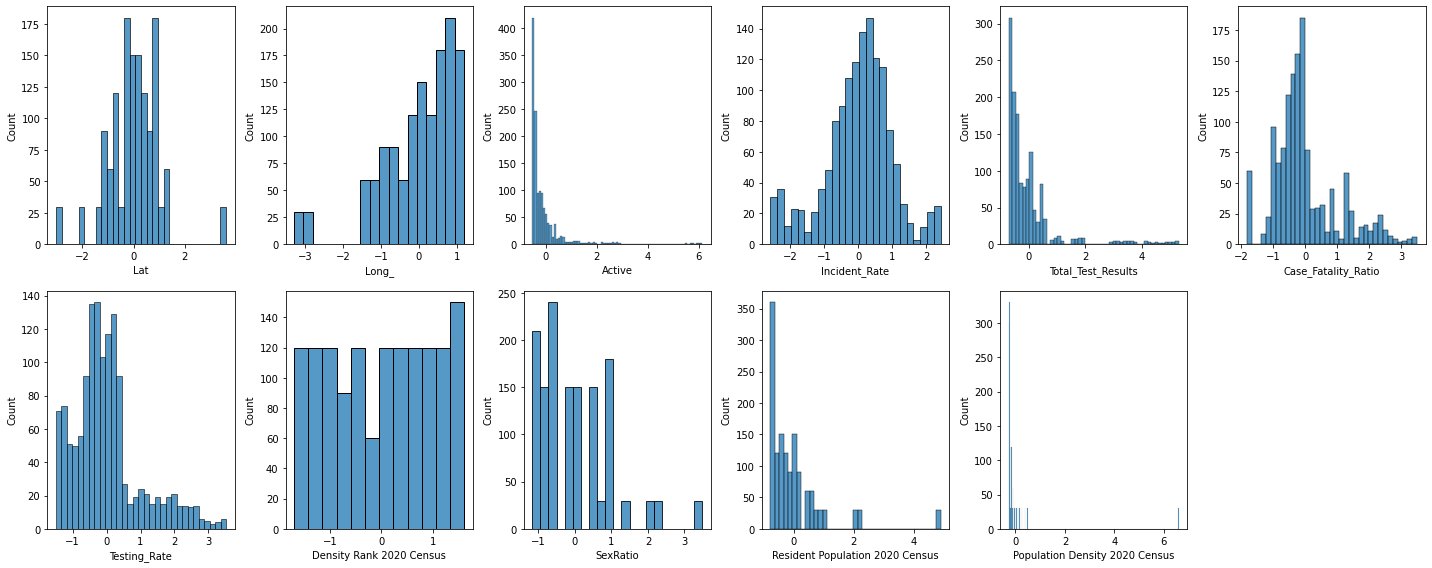

In [9]:
plot_cols=['Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio',
           'Resident Population 2020 Census','Population Density 2020 Census']

a = 2  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig=plt.figure(figsize=(20,8))
  
for col in plot_cols:
    plt.subplot(a, b, c)
    plt.tight_layout()
    sns.histplot(data=Original_data_copy[col])
    c = c + 1
plt.show()

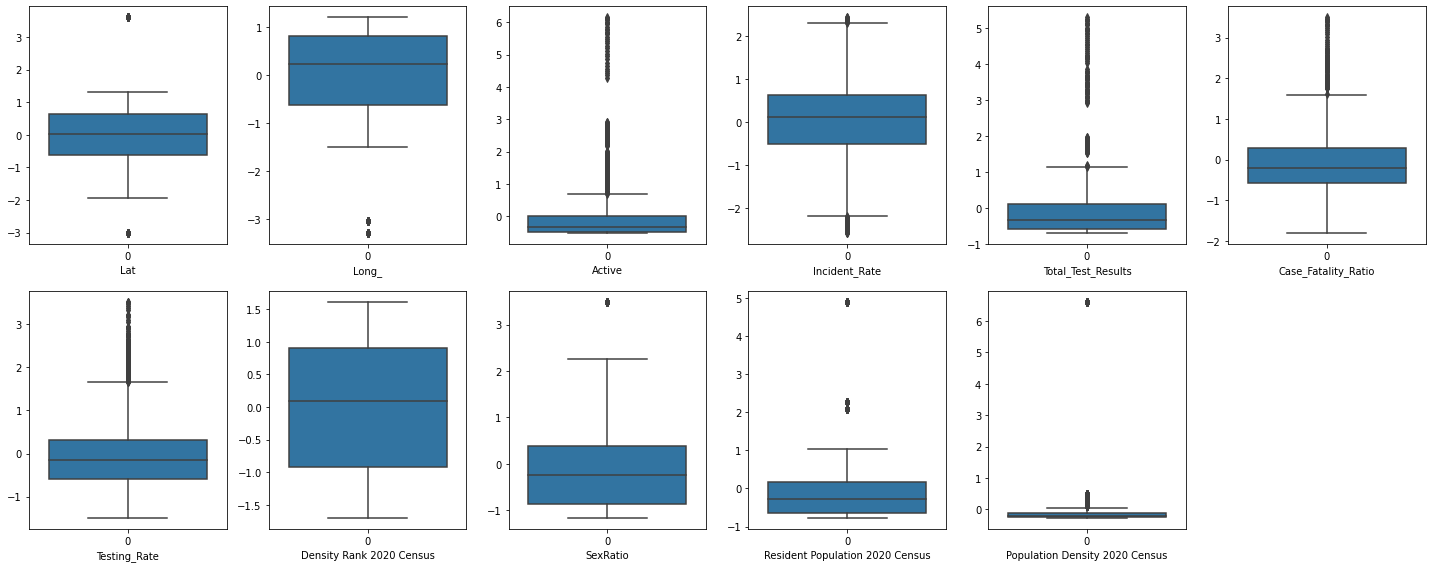

In [10]:
a = 2  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig=plt.figure(figsize=(20,8))
  
for col in plot_cols:
    plt.subplot(a, b, c)
    plt.tight_layout()
    sns.boxplot(data=Original_data_copy[col])
    plt.xlabel(col)
    c = c + 1
plt.show()

Outlier Removal

In [11]:
threshold = 3

for col in plot_cols:
  Original_data_copy['outliers'] = np.where((Original_data_copy[col] - threshold > 0), True, np.where(Original_data_copy[col] + threshold < 0, True, False))
  Original_data_copy.drop(Original_data_copy[Original_data_copy['outliers'] == True].index,inplace=True)
  
Original_data_copy.shape

(1209, 18)

In [12]:
Original_data_copy.count()

Day                                1209
State ID                           1209
State                              1209
Lat                                1209
Long_                              1209
Active                             1209
Incident_Rate                      1209
Total_Test_Results                 1209
Case_Fatality_Ratio                1209
Testing_Rate                       1209
Resident Population 2020 Census    1209
Population Density 2020 Census     1209
Density Rank 2020 Census           1209
SexRatio                           1209
Confirmed                          1209
Deaths                             1209
Recovered                          1209
outliers                           1209
dtype: int64

In [13]:
Original_data_copy.nunique()

Day                                  30
State ID                             41
State                                41
Lat                                  41
Long_                                41
Active                             1162
Incident_Rate                      1159
Total_Test_Results                 1127
Case_Fatality_Ratio                1159
Testing_Rate                       1127
Resident Population 2020 Census      41
Population Density 2020 Census       41
Density Rank 2020 Census             41
SexRatio                             11
Confirmed                             2
Deaths                                2
Recovered                             2
outliers                              1
dtype: int64

In [14]:
df = Original_data_copy.copy()
df

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered,outliers
0,2,1,Alabama,-1.178670,0.304586,-0.200701,0.144028,-0.483568,-0.476902,-1.302217,-0.128626,-0.217091,0.118788,-1.168679,True,False,False,False
2,2,3,Arizona,-0.946051,-0.945268,0.389194,0.088543,-0.007494,0.074416,-1.269412,0.181627,-0.239250,0.509092,0.385056,True,True,True,False
3,2,4,Arkansas,-0.741727,0.025825,-0.482520,0.202252,-0.456622,-0.031311,-0.559356,-0.422184,-0.242302,0.574143,-0.547185,True,True,True,False
5,2,6,Colorado,-0.067715,-0.633423,0.111972,-0.570048,-0.113944,-0.279565,-0.344232,-0.019322,-0.243645,0.769295,1.006550,True,True,True,False
6,2,7,Connecticut,0.350524,1.025433,-0.176737,-0.811853,-0.127020,2.401070,0.763460,-0.335488,0.176943,-1.377378,-0.857932,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,31,46,Vermont,0.753949,1.027710,-0.524201,-2.293948,-0.625809,-0.270412,1.274271,-0.767619,-0.235038,0.378991,-0.236438,True,True,True,False
1376,31,47,Virginia,-0.280378,0.749535,0.400942,-0.559558,-0.005286,-0.534982,-0.745315,0.397468,-0.144206,-0.726871,-0.236438,True,True,True,False
1377,31,49,West Virginia,-0.161416,0.607653,-0.488254,-0.195930,-0.475825,0.062389,0.411281,-0.599800,-0.232108,0.248890,0.074309,True,True,True,False
1378,31,50,Wisconsin,0.790631,0.166286,-0.391879,1.287559,0.129702,-0.830494,0.351006,-0.001819,-0.211231,-0.011313,0.385056,True,True,True,False


80-20 train test split for 3 networks

In [15]:
df_d=df.drop(['State','Confirmed','Deaths','Recovered','outliers'],axis=1)
y=df.iloc[:, -4:]
y=y.drop(['outliers'],axis=1)
df_d

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
0,2,1,-1.178670,0.304586,-0.200701,0.144028,-0.483568,-0.476902,-1.302217,-0.128626,-0.217091,0.118788,-1.168679
2,2,3,-0.946051,-0.945268,0.389194,0.088543,-0.007494,0.074416,-1.269412,0.181627,-0.239250,0.509092,0.385056
3,2,4,-0.741727,0.025825,-0.482520,0.202252,-0.456622,-0.031311,-0.559356,-0.422184,-0.242302,0.574143,-0.547185
5,2,6,-0.067715,-0.633423,0.111972,-0.570048,-0.113944,-0.279565,-0.344232,-0.019322,-0.243645,0.769295,1.006550
6,2,7,0.350524,1.025433,-0.176737,-0.811853,-0.127020,2.401070,0.763460,-0.335488,0.176943,-1.377378,-0.857932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,31,46,0.753949,1.027710,-0.524201,-2.293948,-0.625809,-0.270412,1.274271,-0.767619,-0.235038,0.378991,-0.236438
1376,31,47,-0.280378,0.749535,0.400942,-0.559558,-0.005286,-0.534982,-0.745315,0.397468,-0.144206,-0.726871,-0.236438
1377,31,49,-0.161416,0.607653,-0.488254,-0.195930,-0.475825,0.062389,0.411281,-0.599800,-0.232108,0.248890,0.074309
1378,31,50,0.790631,0.166286,-0.391879,1.287559,0.129702,-0.830494,0.351006,-0.001819,-0.211231,-0.011313,0.385056


In [16]:
y

,Confirmed,Deaths,Recovered
0,True,False,False
2,True,True,True
3,True,True,True
5,True,True,True
6,True,True,False
...,...,...,...
1375,True,True,True
1376,True,True,True
1377,True,True,True
1378,True,True,True


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_d,y,test_size=0.20,random_state=98)
print("Size of Training set X is",X_train.shape)
print("Size of Testing X is",X_test.shape)
print()


Size of Training set X is (967, 13)
Size of Testing X is (242, 13)



In [18]:
y1_train=np_utils.to_categorical(y_train['Confirmed'].values)
y2_train=np_utils.to_categorical(y_train['Deaths'].values)
y3_train=np_utils.to_categorical(y_train['Recovered'].values)


y1_test=np_utils.to_categorical(y_test['Confirmed'].values)
y2_test=np_utils.to_categorical(y_test['Deaths'].values)
y3_test=np_utils.to_categorical(y_test['Recovered'].values)
y3_train.shape

(967, 2)

# Default Network

In [19]:
def_net = Sequential()
def_net.add(Dense(20,input_dim=13,activation='relu'))
def_net.add(Dense(20, activation='relu'))
def_net.add(Dense(2, activation='softmax'))

def_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Confirmed Target

In [20]:
def_net_c = def_net.fit(X_train, y1_train, validation_split=0.1, batch_size=32,epochs=100)
def_net.summary()

Epoch 1/100
28/28 [==============================] - 13s 18ms/step - loss: 6.6922 - accuracy: 0.1524 - val_loss: 0.2624 - val_accuracy: 0.9588
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9720 - val_loss: 0.3116 - val_accuracy: 0.9588
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9686 - val_loss: 0.2574 - val_accuracy: 0.9588
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9663 - val_loss: 0.2227 - val_accuracy: 0.9588
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9624 - val_loss: 0.2052 - val_accuracy: 0.9588
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9663 - val_loss: 0.1957 - val_accuracy: 0.9588
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9469 - val_loss: 0.1865 - val_accuracy: 0.9588
Epoch 8/100

In [21]:
#evaluation
def_net_loss,def_net_accuracy=def_net.evaluate(X_test,y1_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9504


Deaths Target

In [22]:
def_netf_d = def_net.fit(X_train, y2_train, validation_split=0.1, batch_size=32,epochs=100)
def_net.summary()

Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.9069 - val_loss: 0.2679 - val_accuracy: 0.9072
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.9149 - val_loss: 0.2535 - val_accuracy: 0.9072
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.9115 - val_loss: 0.2793 - val_accuracy: 0.9072
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.9138 - val_loss: 0.2957 - val_accuracy: 0.9278
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.9126 - val_loss: 0.2530 - val_accuracy: 0.9072
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.9161 - val_loss: 0.2513 - val_accuracy: 0.9072
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9172 - val_loss: 0.2478 - val_accuracy: 0.9072
Epoch 8/100
2

In [23]:
def_net_loss,def_net_accuracy=def_net.evaluate(X_test,y2_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.8967


Recovered Target

In [24]:
def_netf_r = def_net.fit(X_train, y3_train, validation_split=0.1, batch_size=32,epochs=100)
def_net.summary()

Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 1.0684 - accuracy: 0.5678 - val_loss: 0.6694 - val_accuracy: 0.7010
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6816 - val_loss: 0.6364 - val_accuracy: 0.6289
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7057 - val_loss: 0.5569 - val_accuracy: 0.7526
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7195 - val_loss: 0.4895 - val_accuracy: 0.7938
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7483 - val_loss: 0.4736 - val_accuracy: 0.7629
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5264 - accuracy: 0.7471 - val_loss: 0.5088 - val_accuracy: 0.7526
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7805 - val_loss: 0.4562 - val_accuracy: 0.7732
Epoch 8/100
2

In [25]:
def_net_loss,def_net_accuracy=def_net.evaluate(X_test,y3_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.9256


Training loss vs training epoch

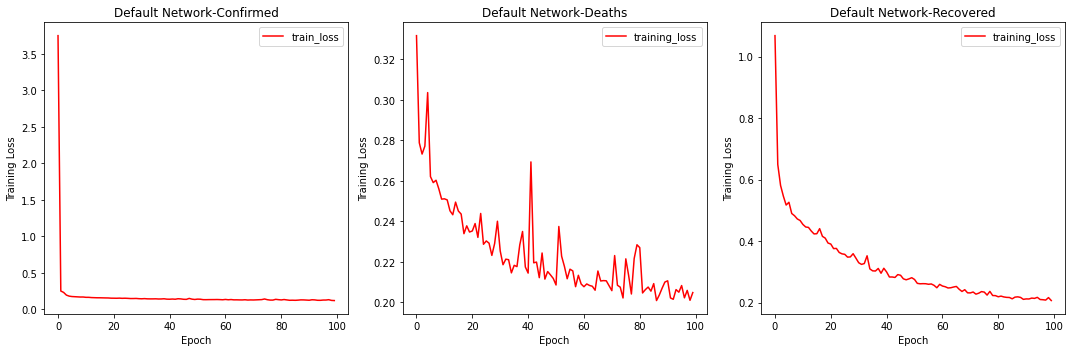

In [26]:
plt.figure(figsize=(15,5))


plt.subplot(131)
plt.title('Default Network-Confirmed')
plt.plot(def_net_c.history['loss'], label='train_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(132)
plt.title('Default Network-Deaths')
plt.plot(def_netf_d.history['loss'], label='training_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

plt.subplot(133)
plt.title('Default Network-Recovered')
plt.plot(def_netf_r.history['loss'], label='training_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

plt.tight_layout()

Classification accuracy vs epoch

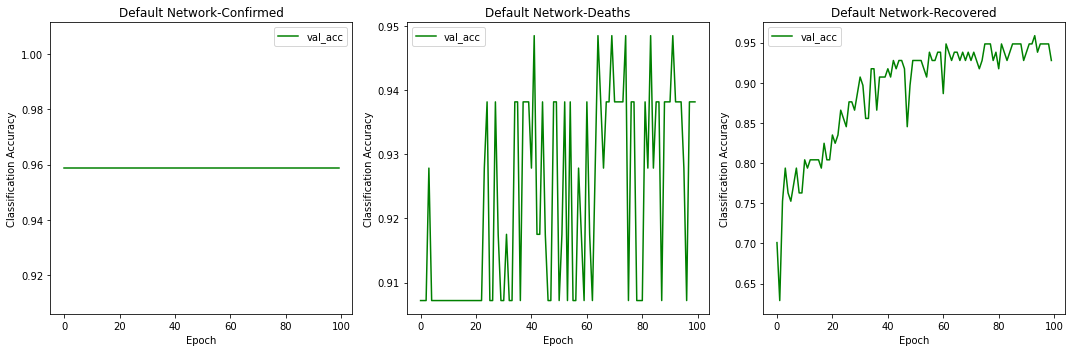

In [27]:
plt.figure(figsize=(15,5))


plt.subplot(131)
plt.title('Default Network-Confirmed')
plt.plot(def_net_c.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()


plt.subplot(132)
plt.title('Default Network-Deaths')
plt.plot(def_netf_d.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(133)
plt.title('Default Network-Recovered')
plt.plot(def_netf_r.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.tight_layout()

Training accuracy vs Validation accuracy

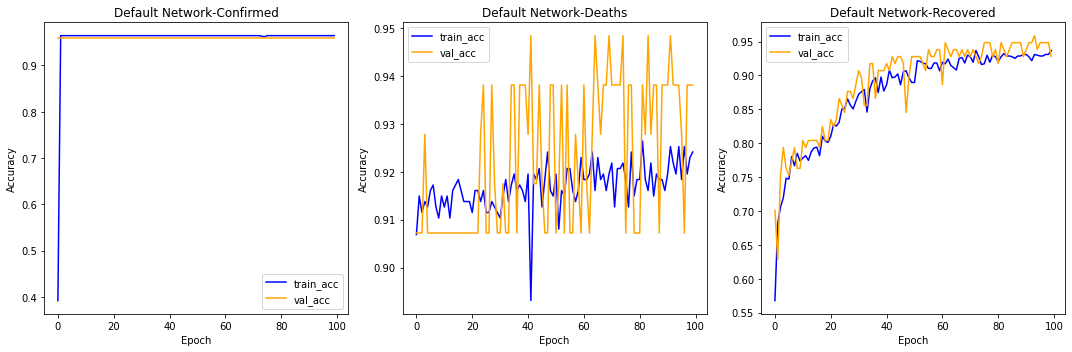

In [28]:
plt.figure(figsize=(15,5))


plt.subplot(131)
plt.title('Default Network-Confirmed')
plt.plot(def_net_c.history['accuracy'], label='train_acc', color='blue')
plt.plot(def_net_c.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(132)
plt.title('Default Network-Deaths')
plt.plot(def_netf_d.history['accuracy'], label='train_acc', color='blue')
plt.plot(def_netf_d.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(133)
plt.title('Default Network-Recovered')
plt.plot(def_netf_r.history['accuracy'], label='train_acc', color='blue')
plt.plot(def_netf_r.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

# RNN/LSTM

## Data Preprocessing

In [29]:
data = np.array(df_d)
# add time step dimension of 1 for input to the LSTM network
data = data.reshape(data.shape[0], 1, data.shape[1])
print(data.shape)

(1209, 1, 13)


In [30]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.20,random_state=98)
print("Size of Training set X is",X_train.shape)
print("Size of Testing X is",X_test.shape)
print()


Size of Training set X is (967, 1, 13)
Size of Testing X is (242, 1, 13)



In [31]:
y1_train=np_utils.to_categorical(y_train['Confirmed'].values)
y2_train=np_utils.to_categorical(y_train['Deaths'].values)
y3_train=np_utils.to_categorical(y_train['Recovered'].values)


y1_test=np_utils.to_categorical(y_test['Confirmed'].values)
y2_test=np_utils.to_categorical(y_test['Deaths'].values)
y3_test=np_utils.to_categorical(y_test['Recovered'].values)


## Building Network

In [32]:
from tensorflow import keras
from keras.layers import LSTM, InputLayer, Dense

In [33]:
lstm_net = Sequential()
lstm_net.add(InputLayer(input_shape=(1, 13)))
lstm_net.add(LSTM(32, activation='relu'))
lstm_net.add(Dense(10, activation='relu'))
lstm_net.add(Dense(2, activation='sigmoid'))

lstm_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_net.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5888      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 6,240
Trainable params: 6,240
Non-trainable params: 0
_________________________________________________________________
None


## Model Training

### Confirmed Target

In [34]:
lstm_net_c = lstm_net.fit(X_train, y1_train, validation_split=0.1, batch_size=32,epochs=100)
lstm_net.summary()

Epoch 1/100
28/28 [==============================] - 9s 21ms/step - loss: 0.4425 - accuracy: 0.8057 - val_loss: 0.2085 - val_accuracy: 0.9588
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9678 - val_loss: 0.1962 - val_accuracy: 0.9588
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9688 - val_loss: 0.1907 - val_accuracy: 0.9588
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9577 - val_loss: 0.1866 - val_accuracy: 0.9588
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.9593 - val_loss: 0.1770 - val_accuracy: 0.9588
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9636 - val_loss: 0.1716 - val_accuracy: 0.9588
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9662 - val_loss: 0.1654 - val_accuracy: 0.9588
Epoch 8/100


In [35]:
#evaluation
lstm_net_loss,lstm_net_accuracy=lstm_net.evaluate(X_test,y1_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9504


### Deaths Target

In [36]:
lstm_netf_d = lstm_net.fit(X_train, y2_train, validation_split=0.1, batch_size=32,epochs=100)
lstm_net.summary()

Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8908 - val_loss: 0.3848 - val_accuracy: 0.8969
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.9011 - val_loss: 0.2765 - val_accuracy: 0.9175
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9069 - val_loss: 0.2494 - val_accuracy: 0.9278
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9161 - val_loss: 0.2323 - val_accuracy: 0.9278
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9172 - val_loss: 0.2165 - val_accuracy: 0.9072
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9172 - val_loss: 0.2468 - val_accuracy: 0.9072
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9092 - val_loss: 0.2043 - val_accuracy: 0.9175
Epoch 8/100
2

In [37]:
lstm_net_loss,lstm_net_accuracy=lstm_net.evaluate(X_test,y2_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8843


### Recovered Target

In [38]:
lstm_netf_r = lstm_net.fit(X_train, y3_train, validation_split=0.1, batch_size=32,epochs=100)
lstm_net.summary()

Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 1.1914 - accuracy: 0.5517 - val_loss: 0.6498 - val_accuracy: 0.6186
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6598 - val_loss: 0.5527 - val_accuracy: 0.7010
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7184 - val_loss: 0.4888 - val_accuracy: 0.7216
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7644 - val_loss: 0.4784 - val_accuracy: 0.7629
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.7851 - val_loss: 0.4396 - val_accuracy: 0.7938
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.7897 - val_loss: 0.4118 - val_accuracy: 0.8144
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8080 - val_loss: 0.3985 - val_accuracy: 0.8351
Epoch 8/100
2

In [39]:
lstm_net_loss,lstm_net_accuracy=lstm_net.evaluate(X_test,y3_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9380


## Plotting

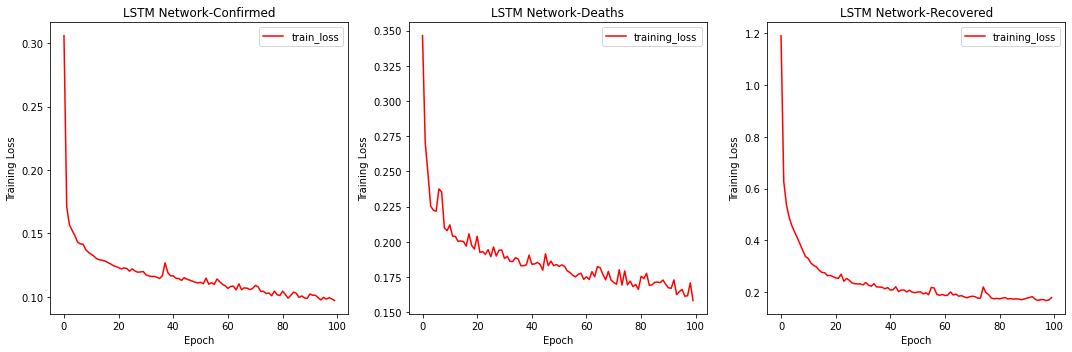

In [40]:
plt.figure(figsize=(15,5))


plt.subplot(131)
plt.title('LSTM Network-Confirmed')
plt.plot(lstm_net_c.history['loss'], label='train_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(132)
plt.title('LSTM Network-Deaths')
plt.plot(lstm_netf_d.history['loss'], label='training_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

plt.subplot(133)
plt.title('LSTM Network-Recovered')
plt.plot(lstm_netf_r.history['loss'], label='training_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

plt.tight_layout()

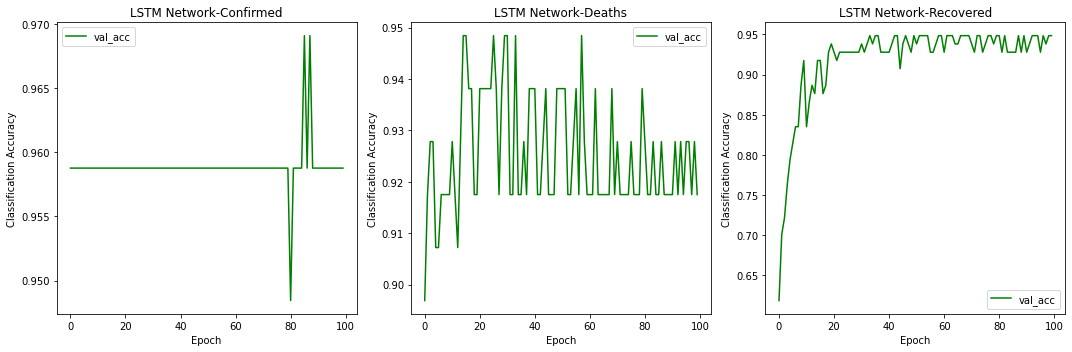

In [41]:
plt.figure(figsize=(15,5))


plt.subplot(131)
plt.title('LSTM Network-Confirmed')
plt.plot(lstm_net_c.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()


plt.subplot(132)
plt.title('LSTM Network-Deaths')
plt.plot(lstm_netf_d.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(133)
plt.title('LSTM Network-Recovered')
plt.plot(lstm_netf_r.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.tight_layout()

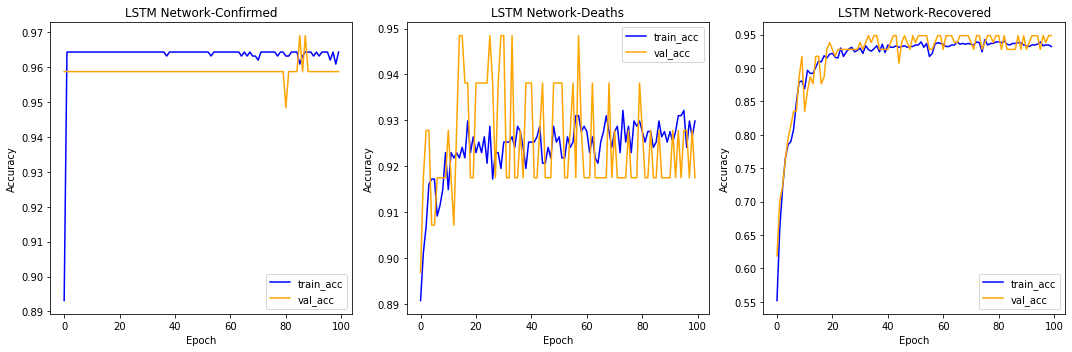

In [42]:
plt.figure(figsize=(15,5))


plt.subplot(131)
plt.title('LSTM Network-Confirmed')
plt.plot(lstm_net_c.history['accuracy'], label='train_acc', color='blue')
plt.plot(lstm_net_c.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(132)
plt.title('LSTM Network-Deaths')
plt.plot(lstm_netf_d.history['accuracy'], label='train_acc', color='blue')
plt.plot(lstm_netf_d.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(133)
plt.title('LSTM Network-Recovered')
plt.plot(lstm_netf_r.history['accuracy'], label='train_acc', color='blue')
plt.plot(lstm_netf_r.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()